<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/LinearRegressionTFv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=""

%tensorflow_version 2.x
import tensorflow as tf
print("TensorFlow Version: ", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Python 3.8.10
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
TensorFlow Version:  2.9.2
Num GPUs Available:  0


The code is written in TensorFlow version 1.  

You need to add the following two lines to re-import tensorflow version 1 and disable version 2.

In [1]:
# %tensorflow_version 1.x
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


Model parameters

In [2]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)

Model input and output, linear model $y = Wx + b$.

In [3]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = W*x+b

Define loss

In [4]:
loss = tf.reduce_sum(tf.square(linear_model - y))

Define optimizer

In [5]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

Training data

In [6]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-4]

Training loop

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
#File_Writer = tf.summary.FileWriter('C:\\Users\\dongl\\ClassExamples\\graph',sess.graph)

# v = session.run(fetches, feed_dict=None, options=None, run_metadata=None)
# fetches is a TensorFlow graph element (or a tuple, list, etc. of graph elements);
# feed_dict contains the input and expected data used to compute the values of the elements in fetches.

sess.run(init)

for i in range(1000):
    sess.run(train, {x:x_train, y:y_train})
    
# Evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
print("W: %s  b: %s  loss: %s"%(curr_W, curr_b, curr_loss))

sess.close()

W: [-1.2999959]  b: [1.4999877]  loss: 0.3


Visualize linear regression result $y = Wx + b$, compared with the training data.

<function matplotlib.pyplot.show(*args, **kw)>

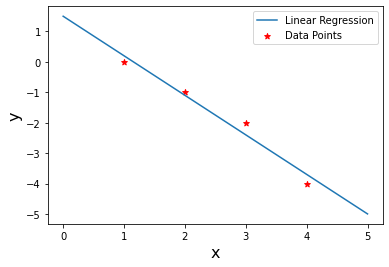

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 10)
y = curr_W * x + curr_b

plt.plot(x, y, label='Linear Regression')
plt.scatter(x_train, y_train, c="r", marker="*", label='Data Points')
plt.xlabel('x', size=16)
plt.ylabel('y', size=16)
plt.legend()
plt.show